<div style="display: flex; align-items: center; gap: 2px;">
  
  <div style="text-align: left; padding: 0;">
   <h2 style="font-size: 1.8em; margin-bottom: 0;"><b>Moving beyond Linearity...</b></h2>
   <br>
   <h3 style=" font-size: 1.2em;margin-bottom: 0;">Alternatives to Linear Regression</h3>
   <h3 style="font-size: 1.2em; margin-bottom: 0; color: blue;"><i>Dr. Satadisha Saha Bhowmick</i></h3>
  </div>

  <div style="margin-right: 5px; padding: 0;">
    <img src="images/intro-pic.png" align="right" alt="intro-pic" style="width: 70%;">
    <!-- TEXT NEXT TO IMAGE -->
      <div style="font-size: 0.5em;">
        <p>Woman teaching geometry, from a fourteenth-century edition of Euclid’s geometry book.</p>
      </div>
  </div>

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from ipywidgets import interact
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

bac_data = pd.read_csv("BLOODALC.csv")

### Module 3: Learning Outcomes
Moving beyond Linear Regression

<div style="display: flex; gap: 2px;">

  <div style="flex: 1;">
  <ul>
    <li class="fragment">Adjust for nonlinearity in regression using squared and polynomial terms.</li>
    <li class="fragment">Adjust for nonconstant variance or outlying values using weighted least squares.</li>
  </ul>

  
  </div>

  <div style="flex: 1;">
  <ul>
    <li class="fragment">Use regularization methods like ridge or LASSO for large $p$, small $n$ problems.</li>
    <li class="fragment">Variable Selection using Ridge or LASSO.</li>
    <li class="fragment">Use smoothers (splines in particular) to detect patterns in data.</li>
  </ul>
  </div>

</div>

### Non Linearity
Often the relationship between the response variable $Y$ and the independent variable $X$ is non-linear.

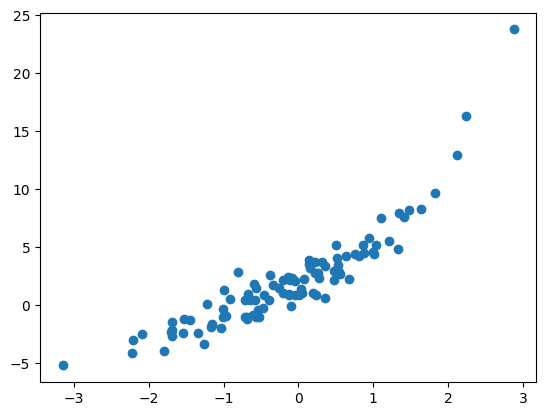

In [2]:
np.random.seed(12)
X = np.random.normal(0,1,size=(100,1))
Y = 2*X + np.exp(X) + np.random.normal(1,1,size=(100,1))

plt.scatter(X,Y)

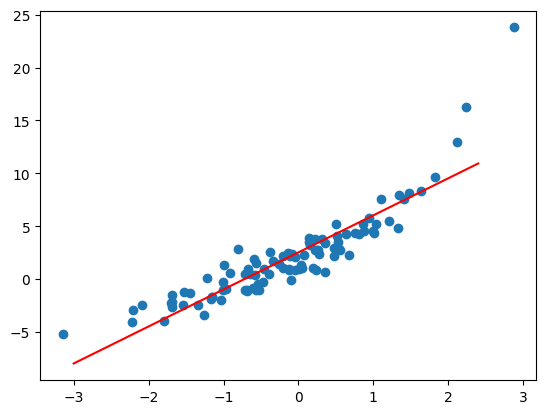

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,Y)

plt.scatter(X,Y)
plt.plot(np.arange(-3,2.5,0.1),reg.predict(np.arange(-3,2.5,0.1).reshape(-1,1)),color="red")

### Squared and Polynomial Terms
<p>What happens if you see a curved pattern in your residuals?</p> 
<div style="display: flex; align-items: center; gap: 5px;">

  <div class="fragment"; style="flex: 1;">
    <p>We can use squared ($\color{blue}{\textit{or even higher order}}$!) terms in linear regression by simply adding them to the design matrix.</p>
    <p>
    $$\begin{aligned}
        \begin{bmatrix}
        1 & x_{11} & x^2_{11}\\
        1 & x_{21} & x^2_{21}\\
        \vdots & \vdots & \vdots\\
        1 & x_{n1} & x^2_{n1}
        \end{bmatrix} \begin{bmatrix}
        \beta_0\\
        \beta_1\\
        \beta_2
        \end{bmatrix} &= \begin{bmatrix}
        y_1\\
        y_2\\
        \vdots\\
        y_n
        \end{bmatrix}
    \end{aligned}$$
    </p>
    <p>Because the squared terms are captured in the design matrix, we can still consider this to be “linear in the parameters” and solve for their coefficients using <b>least squares</b>.</p>
  </div>

  <div class="fragment"; style="flex: 1;">
    <img src="images/curved-residuals.png" alt="Confidence Band" scale="0.85;" style="width: 90%;">
  </div>
</div>

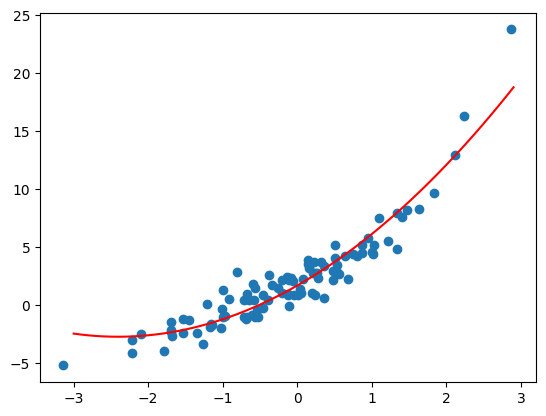

In [4]:
D_matrix = np.hstack([X,X**2])
quad_reg = LinearRegression()
quad_reg.fit(D_matrix,Y)

ax = np.arange(-3,3,0.1).reshape(-1,1)
plt.scatter(X,Y)
plt.plot(ax,quad_reg.predict(np.hstack([ax,ax**2])),color="red")

We can add these higher order features using the PolynomialFeatures tool in the ``sklearn.preprocessing`` module.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)
poly_X[0:5]

array([[ 1.        ,  0.47298583,  0.2237156 ],
       [ 1.        , -0.68142588,  0.46434123],
       [ 1.        ,  0.2424395 ,  0.05877691],
       [ 1.        , -1.70073563,  2.8925017 ],
       [ 1.        ,  0.75314283,  0.56722413]])

Adding higher and higher degree terms fits the data better, but at a certain point starts capturing the true relationship worse.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)
poly_X = poly.fit_transform(X)


poly_reg = LinearRegression()
poly_reg.fit(poly_X,Y)

ax = np.arange(-3.2,3.2,0.1).reshape(-1,1)
plt.scatter(X,Y)
plt.plot(ax,poly_reg.predict(poly.transform(ax)),color="brown")

<img src="images/poly-overfit.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

### Some Practical Notes

- To implement polynomial regression, just add a new column to your dataframe.
- To avoid multicollinearity, center your feature terms.
- You can also add higher order terms, $x^3$, $x^4$, etc.
- If you have a higher order term, it is good practice to include all lower order terms leading up to it.
    - A model with $x^2$ must include $x$.
    - A model with $x^3$ must include $x^2$ and $x$.
- How to choose the degree of the polynomial? $\rightarrow$ Tune it as a hyperparameter during validation!

### Interaction Terms

You can also construct an interaction term.
- An interaction term is appropriate when a dependent variable (outcome) changes, depending on the variation of one or more other predictors simultaneously.
- In a regression equation, an interaction effect is represented as the product of two or more predictors.
$$
y_i = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_{12}x_1x_2
$$
- We can use interactions terms in linear regression by simply adding the term to the design matrix.

$$\begin{aligned}
\begin{bmatrix}
1 & x_{11} & x_{12} & x_{11}x_{12}\\
1 & x_{21} & x_{22} & x_{21}x_{22}\\
\vdots & \vdots & \vdots & \vdots\\
1 & x_{n1} & x_{n2} & x_{n1}x_{n2}
\end{bmatrix} \begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\beta_{12}
\end{bmatrix} &= \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
\end{aligned}$$

### Interaction Terms

Consider these graphs of the BAC dataset. In each graph, the red line represents females and the blue line represents males.
<img src="images/interaction-terms.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

- The slopes in the graph of BAC vs. Beers are fairly close.
- The slopes in the graph of Weight vs. Beers are totally different–the slope for females appears negative, and the slope for males appears positive!
    - This is indicative of the need for an interaction term between gender and weight.

Resulting equation:
$
y = \beta_0+ \beta_\text{beers}x_\text{beers}+ \beta_\text{weight}x_\text{weight}+ \beta_\text{sex}x_\text{sex} + \beta_\text{weightXsex}x_\text{weight}x_\text{sex}
$

### Some Practical Notes

- To implement, just add a new column to your dataframe.
- Be especially careful of multicollinearity, since you are directly calculating one predictor using others.
- If you do have a higher order term, it’s good practice to include all of the terms below it.
    - A model with $x_1x_2$, must include terms $x_1$ and $x_2$.
    -  A model with $x_1x_2x_3$, must include terms $x_1x_2$, $x_2x_3$, $x_1x_3$ as well as $x_1$, $x_2$ and $x_3$.

In [7]:
full_bac_df = pd.read_csv("BLOODALC.csv")
bac_df = pd.get_dummies(full_bac_df[["Gender_OSU","Beers","Weight_OSU","BAC"]],drop_first = True)
bac_df.head(5)

,Beers,Weight_OSU,BAC,Gender_OSU_male
0,5,132,0.10,False
1,2,128,0.03,False
2,9,110,0.19,False
3,8,192,0.12,True
4,3,172,0.04,True


By only including the interaction terms, you can in fact reproduce the coefficients for doing two separate regressions if we filter by gender!

In [8]:
poly_int = PolynomialFeatures(degree = 2,interaction_only=True)
poly_int.fit_transform(bac_df[["Beers","Gender_OSU_male"]])

array([[1., 5., 0., 0.],
       [1., 2., 0., 0.],
       [1., 9., 0., 0.],
       [1., 8., 1., 8.],
       [1., 3., 1., 3.],
       [1., 7., 0., 0.],
       [1., 3., 0., 0.],
       [1., 5., 1., 5.],
       [1., 3., 0., 0.],
       [1., 5., 1., 5.],
       [1., 4., 0., 0.],
       [1., 6., 1., 6.],
       [1., 5., 0., 0.],
       [1., 7., 1., 7.],
       [1., 1., 1., 1.],
       [1., 4., 1., 4.]])

### How far can we go with this?

We can use similar techniques to estimate $y$ as a function of $x_1,..,x_k$ as long as we expect $y$ is of the form
$$y = \left(\sum_{i=1}^M \beta_i f_{i}(x_1,..,x_k)\right) + \epsilon$$

Here again $\epsilon$ is the distribution of residuals.

We simply find the least squares solution to

$$ \begin{bmatrix} f_{1}(x_{1,1},\ldots,x_{1,k}) & f_{2}(x_{1,1},\ldots,x_{1,k}) & \ldots & f_{M}(x_{1,1},..,x_{1,k}) \\
 f_{1}(x_{2,1},\ldots,x_{2,k}) & f_{2}(x_{2,1},\ldots,x_{2,k}) & \ldots & f_{M}(x_{2,1},..,x_{2,k}) \\
 \vdots & \vdots & \ddots & \vdots \\
  f_{1}(x_{n,1},\ldots,x_{n,k}) & f_{2}(x_{n,1},\ldots,x_{n,k}) & \ldots & f_{M}(x_{n,1},..,x_{n,k}) \end{bmatrix} \vec{\beta} = \vec{y} $$

Though as we see it's quite powerful, this ultimately is the limit of linear regression.

It is quite general, but doesn't allow us to fit everything. For instance, we can't use least squares linear regression to fit a relationship of the form
$$y = \beta_0 \sin(\beta_1 x) + \epsilon$$

because $\beta_1$ is inside the function.

### The limits of polynomial regression.

For general purpose polynomials are pretty good, but they have their limits. 
Even if we have tons and tons of data, they just can't fit certain functions that well.

- Polynomials cannot fit threshold effects, e.g., a nearly flat curve that suddenly accelerates.
- Polynomials cannot fit logarithmic-looking relationships, i.e., ones that progressively flatten over a long interval.
- Polynomials can't have a very rapid turn.
- Higher order polynomial curves include lots of oscillations.

As the degree of the polynomial increases, the curves show unrealistic increases/decreases. As a result the model may fit the noise in the data rather than the underlying pattern, resulting in poor extrapolation outside the range of training data.<br>
Polynomial regression therefore carry high overfitting risk.

In [ ]:
np.random.seed(0)

# True nonlinear function (Runge function)
def runge(x):
    return 1 / (1 + 25 * x**2)

# Generate data
xg = np.linspace(-1, 1, 600)
yg_true = runge(xg)

degrees = [1, 3, 5, 9]
plt.figure(figsize=(9, 5))
plt.plot(xg, yg_true, linewidth=2, label="true f(x)")

for d in degrees:
    # Construct polynomial design matrix
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X = poly.fit_transform(xg.reshape(-1, 1))
    Xg = poly.transform(xg.reshape(-1, 1))
    
    # Fit least squares regression
    model = LinearRegression()
    model.fit(X, yg_true)
    
    # Predict on data
    yg_hat = model.predict(Xg)
    
    # Plot the fit
    plt.plot(xg, yg_hat, label=f"deg {d}")

plt.title("Limits of polynomial regression: Runge phenomenon")
plt.xlim(-1.2, 1.2)
plt.legend()
plt.show()


<img src="images/runge-fit.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

The solution to this ends up being continuous piecewise polynomial functions, also known as $\color{blue}{\textbf{splines}}$.

### Assumptions of Linear Regression

We are assuming:
- A linear relationship.
- Independent observations.
- The distribution of the residuals is normal.
- The variance of the residuals is constant or equal over all values of $x_i \rightarrow$ $\color{blue}{\textbf{Homoskedasticity}}$.

#### What if the variance is not constant?

<img src="images/heteroskedasticity-II.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

#### Unreliable Observations

Furthermore, what if we only have a few observations for one of the values of $𝑥$?

<img src="images/infrequent-observations.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

### Weighted Linear Regression

Weighted linear regression is a reasonably minor modification to linear regression that can help account for:
- Unreliable Observations (outliers, influential points, noisy data)
- Non-constant variance (Heteroscedasticity)

The idea is some observations are more reliable than others and should therefore be weighed differently.

The purpose of this isn't to address non-linearity.

### Weighted Linear Regression

To do this we introduce a diagonal matrix of weights. Each weight $w_i \geq 0$ is a measure of "reliability" of the data point $P_i = (x_{i,1},...,x_{i,k},y_i)$

$$ W = \begin{bmatrix} w_1 & 0 & \ldots & 0\\
0 & w_2 & \ldots & 0\\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & w_n\end{bmatrix}.$$

Higher weights are more reliable. A weight of $0$ is equivalent running the regression without the data point.

### Weighted Linear Regression

To properly weight the observations, you need to weight both the predictors and the response.

Instead of finding the least squares solution to 
$$X \vec{\beta} = \vec{y}$$
we instead solve
$$WX \vec{\beta} = W\vec{y}$$

Then the Normal Equations become: $\vec{b} = (X^TWX)^{-1}X^TW\vec{y}$

### Example 

Given the data set 
$$(-2,3),(-1,5),(0,5),(1,4),(2,3)$$

suppose we know that the last two points $(1,4)$ and $(2,3)$ are unreliable. So we weight them less.


$$\begin{bmatrix} 1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0.5 & 0\\
0 & 0 & 0 & 0 & 0.5 \end{bmatrix} \begin{bmatrix} 1 & -2\\
1 & -1 \\
1 & 0\\
1 & 1\\
1 & 2 \end{bmatrix} \vec{\beta} = \begin{bmatrix} 1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0.5 & 0\\
0 & 0 & 0 & 0 & 0.5 \end{bmatrix} \begin{bmatrix} 3\\5\\5\\4\\3\end{bmatrix}$$

Note this really just effectively changes our loss function (the residual sum of squares). If $\hat{y}_i$ is the predicted $y$ value we get the weighted residual sum of squares

$$(3 - \hat{y_1})^2 + (5 - \hat{y_2})^2 + ( 0 - \hat{y}_3)^2 + (0.5(4-\hat{y}_4))^2 + (0.5(3-\hat{y}_5))^2$$

### Which weights to use?

Sometimes we might have knowledge about how the data was collected and assign weights manually. For instance, suppose we are taking readings, and a certain mechanical error on a sensor can double the measurement error. We can weighted those points less and still gain value from the data collected by the malfunctioning sensor.

Otherwise, we might weight an observation according to how "well-behaved" it is.
- Residuals (generally, $\frac{1}{\textrm{residual}}^2$)
- Leverage
- Cook's D

This technique also goes by the names of robust regression or iterated re-weighted least squares regression and is especially good for handling outliers.

### Iterated Weighted Least Squares Regression

Note two of these weighting schemes require residuals. Yet residuals require us to have a regression line!!
In these case we generally use <u style="color: blue; font-size: 1.0em; font-weight: bold;">Iterated Weighted Least Squares Regression</u>.

<b>IWLS Steps</b>:

1. Built a regression line using an unweighted regression.
2. Use the residuals from the previous step to get weights.
3. Run a regression using the weights found.
4. Repeat starting from step 2, until a suitable regression is found.

## Regularization in General

There are at least 3 reasons why we might want to regularize regression models.
1. Ill-posed Problems (Non-unique Solutions, really high numerical instability).
2. Prevent Overfitting.
3. Create "parsimonious models" with fewer parameters that are simpler or more explainable.

We want to avoid overfitting, which (usually) means avoiding overcomplicated models. How do we analytically approach this?

### Bias Variance Decomposition

Learning error of a model can be decomposed into two terms.

$$\text{MSE} = \text{bias}^2 + \text{Variance}$$

If $y$ is a population parameter, in this case the true response value of a sample, and $\hat{y}$ is an approximation obtained from the fitted value, then learning error can be characterized as:

$$E[(y-\hat{y})^2] = E[(y-E[\hat{y}])^2] + E[(\hat{y} - E[\hat{y}])^2]$$

Let's see what this means for a linear regression model fitted on a sample.

In [10]:
#Sample Data
X = np.random.normal(0,1,size=(100,1))
Y = 2*X + np.exp(X) + np.random.normal(1,1,size=(100,1))
reg = LinearRegression()
reg.fit(X,Y)

#Population Data
X_pop = np.random.normal(0,1,size=(1_000_000,1))
Y_pop = 2*X_pop + np.exp(X_pop) + np.random.normal(1,1,size=(1_000_000,1))
pop_reg = LinearRegression()
pop_reg.fit(X_pop,Y_pop)

LinearRegression()

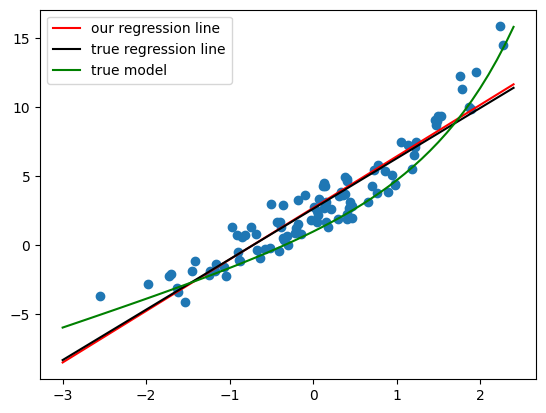

In [12]:
ax = np.arange(-3,2.5,0.1)
plt.plot(ax,reg.predict(ax.reshape(-1,1)),color="red",label="our regression line");

plt.plot(ax,pop_reg.predict(ax.reshape(-1,1)),color="black",label="true regression line");

plt.plot(ax,2*ax+ np.exp(ax),color="green",label="true model");
plt.scatter(X,Y);
plt.legend()

### Bias Variance Decomposition

The true regression line ($\color{blue}{\textit{black line}}$) is what the expected version of a linear model would be if we had access to the population data.

Given that we only have access to a sample, the model we fit ($\color{blue}{\textit{red line}}$) shows deviation in it's predictions ($\hat{y}$) from the expected model's ($E[\hat{y}]$). This is a sample dependent deviation that contributes to the <b><u>variance</u></b>.

Even if our model mimicked its expected version, there are observations for which the latter's output ($E[\hat{y}]$) deviates from the observed outcomes ($y$). This depends on how appropriate the inherent assumptions of our model of choice are w.r.t. to the underlying function ($\color{blue}{\textit{green line}}$) that generates population data. This is a weakness of our chosen model type and contributes to the <b><u>bias</u></b>.

### Bias Variance Decomposition

The problem of overfitting  contributes to the variance component of learning error.

Overfitted models fit the sample data too well to the point of mimicking sample noise as well. Hence they exhibit high variance and poor generalization.

### Regularization for Regression

- In least squares linear regression with $𝑝$ predictors and $𝑛$ data points, estimates of the parameters in the model are calculated by minimization of the least squares objective function.

- Typically all of the least-squares coefficient estimates will be non-zero.
    - This will make interpretation of the final model challenging if $𝑝$ is large.
    - In fact, if $𝑝 > 𝑁$, the least-squares estimates are not unique.
    - There is an infinite set of solutions that make the objective function equal to zero, and these solutions almost surely overfit the data as well.

### Implicit vs Explicit Regularization

There are two types of regularization

1. <b>Explicit Regularization</b> - Adds a term (or constraint) to a loss function, which is some measure of model complexity.
    - Originally, if we wanted to find $\vec{\beta}$ that minimizes $\|X\vec{\beta} - \vec{y}\|$. We instead find $\beta$ that minimizes $$ \|X\vec{\beta} - \vec{y}\| + p(\vec{\beta})$$
    - Alternatively, we could instead of minimizing $\|X\vec{\beta} - \vec{y}\|$, we could instead solve the problem
    $$\|X\vec{\beta} - \vec{y}\| \textrm{ subject to } p(\vec{\beta}) < 10$$
    
    Here $p(\vec{\beta})$ is some measure of model complexity.
    
2. <b>Implicit Regularization</b> - Anything else that is done to prevent the model from getting to complicated. For instance, we attempt to minimize a loss function using gradient descent, but just stop before exceeding a certain number of iterations, i.e. early stopping. (<i>Incredibly common for Neural Networks, it's basically always done</i>).

### Ridge Regression
Ridge Regression imposes restrictions on the magnitude of linear regression parameters $\vec{\beta}: {\beta_1, \beta_2, \dots, \beta_p}$ to reduce the variance of their estimates.

For a fixed $\lambda$, the ridge regression estimates for $\vec{\beta}$, is the unique solution to : $$\textrm{loss} = \textrm{minimize} \sum_{i=1}^N (y_i - \hat{y_i})^2 + \lambda \|\beta\|_2$$
Here $\|\beta\|_2 = \sum_{i=1}^p \beta_i^2$ is the $l_2$ norm of the parameter vector $\vec{\beta}$. The second term in the loss function is the shrinkage penalty. Hence Ridge Regression is often called <b>$L^2$ Regularization</b>.

$\lambda$ is called the <b>regularization parameter</b> that we can tune as a hyperparameter through cross validation.

We want this entire loss to be as small as possible.
- This implies minimizing the MSE and the shrinkage penalty.
- Minimizing the shrinkage penalty means either $\lambda$ being small or all of the individual coefficient estimates being “shrunken” or close to zero.

### Constraint Form of Ridge Regression
It turns out that the penalty form of Ridge Regression above can be restated. For a fixed $\lambda$, there is a fixed number $c > 0$ so that $\hat{\beta_{rr}}$ will be the unique solution to 

$$ \textrm{minimize} \sum_{i=1}^N (y_i - \hat{y_i})^2 \textrm{ subject to } \|\beta\|_2 = c$$

It takes a bit of work to show this, but $\lambda$ essentially becomes the Lagrange Multiplier, if you've seen those in multivariable calculus.

### Regularization Parameter for Ridge Regression
The things you do when setting up your model/parameter estimation process impact your results.
- Choice of loss function (i.e., OLS vs. regularization) 
- Choice of tuning parameter $\lambda$

The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coeﬀicient estimates.
- When $\lambda$ is zero, the penalty term has no effect, and ridge regression will produce the least squares estimates.
- When $\lambda$ is small, the penalty term has little effect, and estimates will be close to the least squares estimates.
- When $\lambda$ is large, the shrinkage penalty grows and the ridge regression coefficients become smaller, approaching zero.

### Implementing and Visualizing Ridge Regression

We can easily implement this loss function for Ridge Regression using the `minimize` function from `scipy`.

Let us implement Ridge Regression to predict BAC using the amount of beers consumed and the weight of the subject.

In [20]:
from scipy.optimize import minimize

X = full_bac_df[["Beers","Weight_OSU"]]
y = full_bac_df["BAC"]
X[:5]

,Beers,Weight_OSU
0,5,132
1,2,128
2,9,110
3,8,192
4,3,172


First though, we must standardize our data to take into account the fact that Weight operates on a larger scale.

In [21]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=1)
X_standardized = (X - X_mean) / X_std
X_standardized[:5]

,Beers,Weight_OSU
0,0.085323,-0.807993
1,-1.279842,-0.889686
2,1.905543,-1.257304
3,1.450488,0.417399
4,-0.824787,0.008935


In [22]:
# Ridge loss function
def ridge_loss(beta, X, y, lam):
    residual = y - X @ beta
    # don't penalize intercept (beta[0])
    penalty = lam * np.sum(beta[1:]**2) 
    return np.sum(residual**2) + penalty

# Function to solve ridge regression using minimize
def solve_ridge(X, y, lam):
    n_features = X.shape[1]
    #initialize coefficient values
    init_beta = np.zeros(n_features)
    result = minimize(ridge_loss, init_beta, args=(X, y, lam), method='BFGS')
    return result.x

In [23]:
#Add column to design matrix for intercept term
X_design = np.hstack((np.ones((X_standardized.shape[0], 1)), X_standardized))

# Run for a range of lambda values
lambdas = np.array([0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100,500,1_000,5_000,10_000])
coefficients = []

for lam in lambdas:
    beta = solve_ridge(X_design, y, lam)
    coefficients.append(beta)

coefficients = np.array(coefficients)

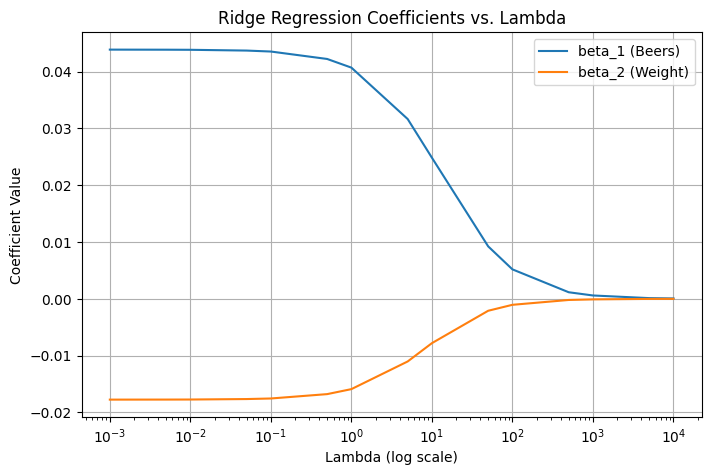

In [24]:
# Plot coefficients vs lambda
plt.figure(figsize=(8, 5))
plt.plot(lambdas, coefficients[:, 1], label='beta_1 (Beers)')
plt.plot(lambdas, coefficients[:, 2], label='beta_2 (Weight)')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients vs. Lambda')
plt.legend()
plt.grid(True)
plt.show()

### Constrained Optimization 

Ridge regression can be view as an instance of constrained optimization. Here we see the constraints for a few values of the regularization parameter $\lambda$.

For each value of $\lambda$, we plot the different values of the two model coefficients ($\vec{\beta}: \beta_1$, $\beta_2$) subject to the constraint.

For $c=\|\hat{\beta}\|_2$, we plot the values of the individual coefficients $\beta_1$ and $\beta_2$ on a flat circle.

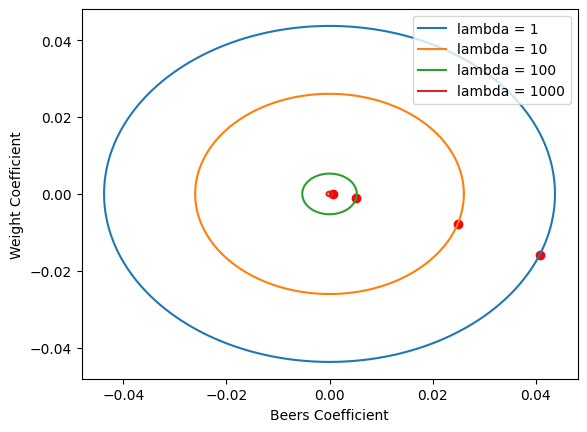

In [25]:
for lam in [1,10,100,1000]:
    betar = solve_ridge(X_design, y, lam)
    c = np.sqrt(betar[1]**2 + betar[2]**2)
    thetas = np.arange(0,2*np.pi,0.0001)
    plt.scatter(betar[1],betar[2],color="red")
    plt.plot(c*np.cos(thetas),c*np.sin(thetas),label=f"lambda = {lam}")
plt.legend()
plt.xlabel("Beers Coefficient")
plt.ylabel("Weight Coefficient")
plt.show()

### Lasso Regularization

Another method of regularization is the Least Absolute Shrinkage and Selection Operator (LASSO), or $l_1$ regularized regression.

$L^1$ Regularization is based off the $L^1$ penalty, itself coming from the $L^1$ norm of the coefficient parameter $\vec{\beta}$
$$\|\vec{\beta}\|_1 = \sum_{i=1}^p \mid \beta_i\mid.$$

It also has two forms

- Penalty Form: $\vec{\beta_L}$ is the unique solution to
$$
\textrm{minimize} \|X\vec{\beta} - \vec{y}\|^2 + \lambda \|\beta\|_1
$$ 

- Constraint Form: $\vec{\beta_L}$ is the unique solution to
$$
\textrm{minimize} \|X\vec{\beta} - \vec{y}\|^2 \text{ subject to} \|\beta\|_1 \leq c
$$

### Lasso Regularization

$L^1$ regularization is a type of automatic feature selection.

If $c$ is small enough, the LASSO yields sparse solution vectors, meaning that only a few model coefficients will be non-zero.<br>
This implies that only the most important features remain in the resulting model.

This can be useful if highly interpretable models are desirable.

In [26]:
# Lasso loss function
def LASSO_loss(beta, X, y, lam):
    residual = y - X @ beta
    penalty = lam * np.sum(np.abs(beta[1:]))  # don't penalize intercept (beta[0])
    return np.sum(residual**2) + penalty

# Function to solve lasso regression using minimize
def solve_LASSO(X, y, lam):
    n_features = X.shape[1]
    init_beta = np.zeros(n_features)
    result = minimize(LASSO_loss, init_beta, args=(X, y, lam), method='BFGS')
    return result.x

In [27]:
# Run for a range of lambda values
lambdas = np.array([0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100,500,1_000,5_000,10_000])
coefficients = []

for lam in lambdas:
    beta = solve_LASSO(X_design, y, lam)
    coefficients.append(beta)

coefficients = np.array(coefficients)

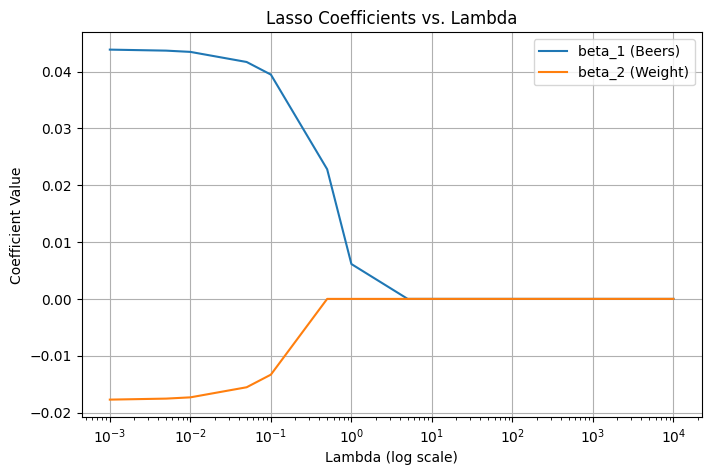

In [28]:
# Plot coefficients vs lambda
plt.figure(figsize=(8, 5))
plt.plot(lambdas, coefficients[:, 1], label='beta_1 (Beers)')
plt.plot(lambdas, coefficients[:, 2], label='beta_2 (Weight)')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs. Lambda')
plt.legend()
plt.grid(True)
plt.show()

### Thats all for now!

<h4><b>Next up Splines...</b></h4>

<div style="text-align: center;">
    <img src="images/tbc.jpg" alt="Spline Regression TBC" scale="0.35;" style="width: 40%;">
</div>